In [1]:
import scvelo as scv
import pandas as pd
import numpy as np
import os

In [8]:
df = pd.read_csv("nsclc_manual_annotation_label.csv")

NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX/velocyto/NSCL_NR001_SNSEQ_3P_NI_BRAIN_GEX.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


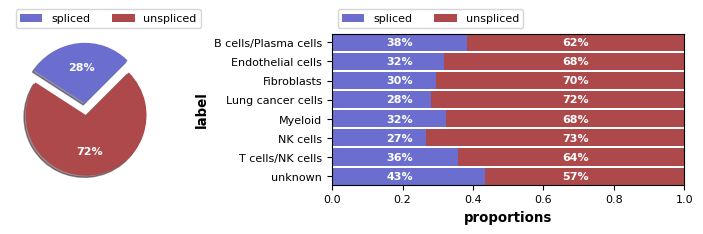

NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX/velocyto/NSCL_NR001_SNSEQ_5P_WI_BRAIN_GEX.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


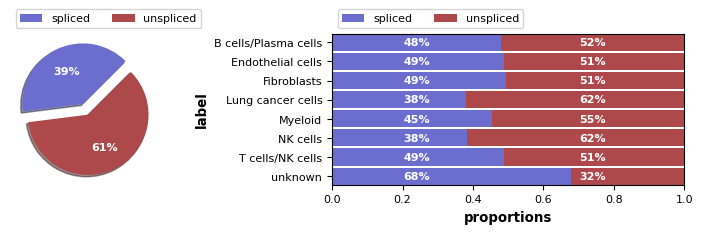

NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX/velocyto/NSCL_NR001_SNSEQ_5P_NI_BRAIN_GEX.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


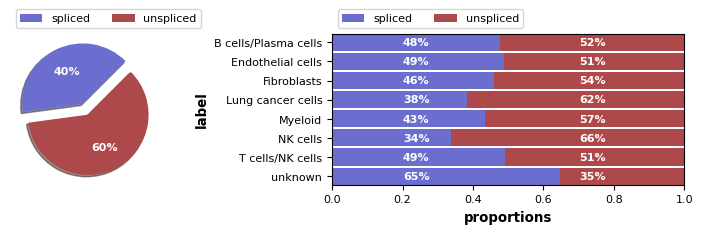

NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX/velocyto/NSCL_NR001_SCRNA_5P_NA_BRAIN_GEX.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


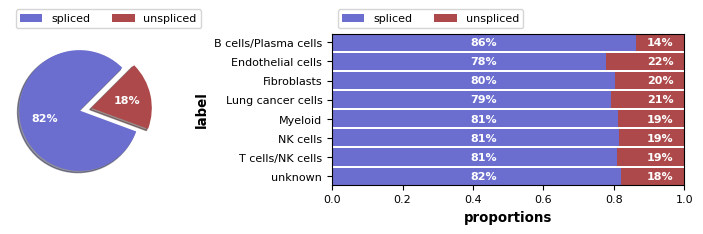

NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX/velocyto/NSCL_NR001_SNSEQ_3P_WI_BRAIN_GEX.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


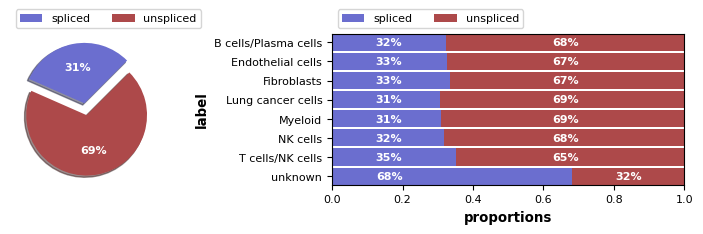

NSCL-NR001-5pv2-snseq/velocyto/NSCL-NR001-5pv2-snseq.loom


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


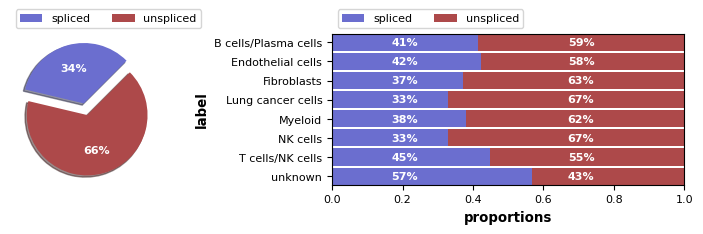

In [17]:
folds = os.listdir()
for i in folds:
    if "NSCL" in i:
        file = i+"/velocyto/"+os.listdir(i+"/velocyto")[0]
        print(file)
        make_proportions(file)

In [10]:
np.unique(df['orig.ident'])

array(['5pv2-snseq', 'SCRNA_5P_NA', 'SNSEQ_3P_NI', 'SNSEQ_3P_WI',
       'SNSEQ_5P_NI', 'SNSEQ_5P_WI'], dtype=object)

In [15]:
def make_proportions(file):
    ad = scv.read(file)

    barcodes = [i.split("-")[0] for i in df["barcode"]]

    keep = []
    label = []
    for i in range(len(ad.obs_names)):
        tmp=ad.obs_names[i].split(":")[1][:-1]
        if tmp in barcodes:
            keep.append(i)
            label.append(df["manual_annotation_label"][barcodes.index(tmp)])

    ad = ad[keep,:]
    ad.obs["label"] = pd.Categorical(label)

    scv.pl.proportions(ad,groupby="label")

In [36]:
adata=ad

In [37]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 59151 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [38]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 382 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:20) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [39]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [40]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [43]:
scv.tl.umap(adata)

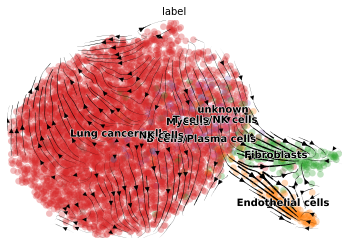

In [45]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="label")


In [42]:
adata

AnnData object with n_obs × n_vars = 5534 × 1618
    obs: 'Clusters', '_X', '_Y', 'label', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'